# Stabla odlucivanja

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored


Klasifikacija pusaca

Ucitavanje i analiza skupa podataka:

In [6]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/smoking.csv")
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [7]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


 Rad sa nedostajucim vrednostima:

In [8]:
data.isna().any().any()

False

In [9]:
data.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

Zakljucujemo da u skupu nema nedostajucih vrednosti.

Podela na ulazne i ciljne atribute:
    (Informacije o tome da li je osoba pusac se nalaze u koloni smoking sto predstavlja ciljni atrinut.
     Ostali atributi se koriste za predikciju - ulazni atributi)

In [11]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N


In [12]:
Y.unique()

array([0, 1])

Klasa Y ima vrednosti 0 i 1 sto znaci da resavamo problem binarne klasifikacije.

Provera balansiranosti klasa:

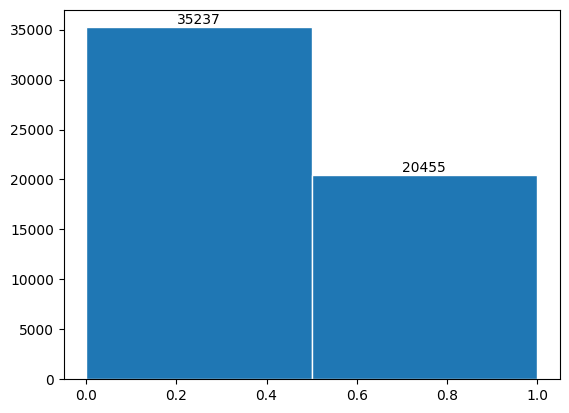

In [15]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()


Na osnovu histograma vidimo da se u skupu nalazi 35237 osoba koje nisu pusaci i 20455 osoba koje jesu pusaci.
Primecujemo blagu nebalansiranost.

Analiza ulaznih atributa i podela na test i trening skup:

In [16]:
X.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=12)

In [57]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=[1, 0], index=[1, 0]))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=[1, 0], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine {} sa {} cvorovima".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [58]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train) 

ValueError: could not convert string to float: 'M'